# Project 2

**Team Name:** costanza

**Members:** Matthew Rogers, Caleb Slaughter

**pids:** rmatt98, calebs87

### Part 1 continuity

We made the hypothesis/initial question a little less specific, as we realized we had a few more ideas for analysis and the project guidelines allowed for multiple ideas to be explored

**old:** Using Cross Country finish times, we want to find out if we can predict time progression from year to year.

**new:** We want to use a club cross country dataset containing different datatypes on race results to learn about some underlying tendencies in races and across club running as a whole.


After initially looking at the data, we realized the race urls and names were all identical, meaning a flaw in our webscraper. Additionally, when adding the column to identify sex, we realized some men's finishers had been incorrectly appended to the womens column. 

The error with the race urls and names was a simple fix as the scraper was rewriting the url column with whatever race id the loop was currently operating on. Making temporary dataframes for each race and appending those to the main dataframe solved that. 

The incorrect sex issue was solved once we did some more digging on NIRCA's results layout. The tables of results are sorted mens -> womens, with each alternating table being team scores (e.g. the first table is mens race results, the second is the team results for that race, and so on). We had incorrectly made the assupmtion that each race had only one mens race and one womens race. When that wasn't the case, the second mens race ended up getting added as a part of the womens results.

The amended project part 1 is included in this submission, along with a notebook containing the fixed data scraper.

## Data Processing

With our (corrected) data in hand, we can begin to process it a little and add some columns we'll need for analysis later on.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
times = pd.read_csv('nirca_historical_times.csv')
times.head()

,Unnamed: 0,Place,Score,Club,Last Name,First Name,Class,Result,race,url,date,distance,sex
0,0,1.0,1.0,North Carolina State University,Chandler II,Max,ALUMN,1589.29,NIRCA XC Regional Championship (Southeast),race_results.php?race=248,"October 24, 2015",8k,M
1,1,2.0,2.0,North Carolina State University,Baraldi,Robert,SR,1590.30,NIRCA XC Regional Championship (Southeast),race_results.php?race=248,"October 24, 2015",8k,M
2,2,3.0,3.0,University of Tennessee,Brey,Nick,ALUMN,1593.33,NIRCA XC Regional Championship (Southeast),race_results.php?race=248,"October 24, 2015",8k,M
3,3,4.0,4.0,North Carolina State University,Rees-Jones,Josh,ALUMN,1606.46,NIRCA XC Regional Championship (Southeast),race_results.php?race=248,"October 24, 2015",8k,M
4,4,5.0,5.0,Duke University,Cardel,Patrick,ALUMN,1615.55,NIRCA XC Regional Championship (Southeast),race_results.php?race=248,"October 24, 2015",8k,M


### Fixing Distances

In college cross country, men typically run an 8 kilometer race while women only race 6 kilometers. In the first part of this project we tagged ALL mens races as 8k and ALL womens races as 6k. This turned out to be incorrect, as there are a few 5k races in there, and at least one mens 6k race that we're aware of. This becomes apparent when looking at a distribution each sex's results.

<AxesSubplot:>

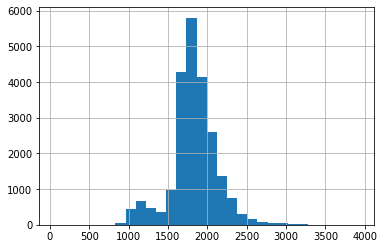

In [3]:
%matplotlib inline
times['Result'][times['sex'] == 'M'].hist(bins = 30)

<AxesSubplot:>

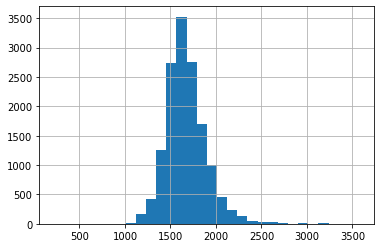

In [4]:
%matplotlib inline
times['Result'][times['sex'] == 'F'].hist(bins = 30)

In the mens histogram there is a clear bimodal distribution, the result of some shorter races in the dataset. The effect of 5ks is not as pronounced in the womens histogram likely because the 1k difference in distance is not as drastic as the 3k difference in the mens. 

Seeing as there are too many results to manually sort through each race, and the race distance is not published on the website, our strategy for correctly labeling these will come down to tagging known 5ks and then sorting the dataset by the fastest times. since 5ks are much faster than 8k/6k races, those will naturally be at the top. We can then cross check the race URL with available race info and correctly tag the race distance.

Since the difference in time is more pronounced in the mens section, starting there seems like the best strategy. We'll also convert the race names to lowercase and strip any extra whitespace to make our efforts that much easier.

In [5]:
times.race = times.race.map(lambda x: x.strip().lower()) # make browing the races easier

One resource we can use is Virginia Tech's club running website. They have a database of all their results from 2014-2019, including race distances. 

http://www.runningclub.org.vt.edu/?page_id=4512

Using those, we can start tagging what 5ks are present in both datasets.

In [6]:
times.distance = np.where((times.race == 'charlotte mcalpine trail race'), '5k', times.distance)

Turns out that's not many. The next idea is to just look at the fastest times. Some races will even have '5k' in their name, making everything easier.

In [7]:
pd.set_option('display.max_rows', 100) # change display settings rq
times[times.sex == 'M'].sort_values(by = 'Result').head(50)

,Unnamed: 0,Place,Score,Club,Last Name,First Name,Class,Result,race,url,date,distance,sex
16966,17450,117.0,0,Kennesaw State University,Onyeije,Nnamdi,SO,60.00,nirca cross country southeast regional,race_results.php?race=688,"October 21, 2018",8k,M
13229,13598,117.0,0,Kennesaw State University,Onyeije,Nnamdi,SO,60.00,nirca cross country southeast regional,race_results.php?race=688,"October 21, 2018",8k,M
3493,3608,146.0,0,University at Buffalo,Ibrahim,Abdulrahman,GRAD,61.00,nirca xc regional championship (northeast),race_results.php?race=246,"October 31, 2015",8k,M
356,356,146.0,0,University at Buffalo,Ibrahim,Abdulrahman,GRAD,61.00,nirca xc regional championship (northeast),race_results.php?race=246,"October 31, 2015",8k,M
7135,7348,51.0,26.0,West Virginia University,Reed,Nathan,GRAD,64.00,mountaineer tune-up,race_results.php?race=386,"October 15, 2016",8k,M
7136,7349,52.0,0,University of Pittsburgh,Goldhorn,Eric,ALUMN,67.00,mountaineer tune-up,race_results.php?race=386,"October 15, 2016",8k,M
21381,21910,226.0,(115),Merrimack College,Gately,Sean,SO,77.00,nirca cross country northeast regional,race_results.php?race=837,"October 26, 2019",8k,M
18381,18909,226.0,(115),Merrimack College,Gately,Sean,SO,77.00,nirca cross country northeast regional,race_results.php?race=837,"October 26, 2019",8k,M
6593,6805,1.0,1,University of Oregon,Walker,Andre,GRAD,878.38,uo running club race,race_results.php?race=414,"October 8, 2016",8k,M
6594,6806,2.0,2,University of Oregon,Jones,Ryan,GRAD,886.46,uo running club race,race_results.php?race=414,"October 8, 2016",8k,M


The first couple of times are obviously false and can be removed. In addition, I (Matt Rogers) know the 2017 mid-atlantic regional had messed up mens times because I ran in the race and had my time messed up. We can safely remove that race as well.

In [8]:
times = times.drop(times[(times.sex == "M") & (times.Result < 80.00)].index)
times = times.drop(times[(times.sex == "M") & (times.race == 'mid-atlantic regional') & (times.date == 'October 21, 2017')].index)

Now we'll just make a list of all the 5ks we can find. It wont be long as finding just one eliminates a lot of the race results, meaning we'll hit 8k times quickly.

In [9]:
known_5ks = ['uo running club race', 'kasey skinner memorial invitational', 'spartan grand classic', 
             'run with the pack 5k', 'run with the pack', 'oregon invite', 'illinois state university invitational',
            'terrier xc invitational 2015', 'north carolina state invitational']

for i in known_5ks:
    times.distance = np.where((times.race == i), '5k', times.distance)

In [10]:
# tag that 6k
times.distance = np.where((times.race == 'illinois state university 6k'), '6k', times.distance)

In [11]:
times[(times.sex == 'M') & (times.distance == '8k')].sort_values(by = 'Result').head(50)

,Unnamed: 0,Place,Score,Club,Last Name,First Name,Class,Result,race,url,date,distance,sex
12548,12889,1.0,1,"University of California, Davis",Kwan,Nathan,ALUMN,1200.00,pacific regional,race_results.php?race=537,"October 28, 2017",8k,M
8908,9167,4.0,4,University of Oregon,Jones,Ryan,GRAD,1200.00,pacific regional,race_results.php?race=537,"October 28, 2017",8k,M
8909,9168,5.0,5,California Polytechnic State University,Krajewski,Mikolaj,SR,1200.00,pacific regional,race_results.php?race=537,"October 28, 2017",8k,M
8910,9169,6.0,6,University of Oregon,pedersen,Robert,GRAD,1200.00,pacific regional,race_results.php?race=537,"October 28, 2017",8k,M
12557,12898,10.0,10,Stanford University,Buenz,Benedikt,ALUMN,1200.00,pacific regional,race_results.php?race=537,"October 28, 2017",8k,M
12556,12897,9.0,9,California Polytechnic State University,Busse,Thomas,GRAD,1200.00,pacific regional,race_results.php?race=537,"October 28, 2017",8k,M
12555,12896,8.0,8,"University of California, Davis",Myers,Chris,ALUMN,1200.00,pacific regional,race_results.php?race=537,"October 28, 2017",8k,M
12554,12895,7.0,7,University of Oregon,Berdahl,Seth,ALUMN,1200.00,pacific regional,race_results.php?race=537,"October 28, 2017",8k,M
8907,9166,3.0,3,California Polytechnic State University,Nishi,Sam,ALUMN,1200.00,pacific regional,race_results.php?race=537,"October 28, 2017",8k,M
12553,12894,6.0,6,University of Oregon,pedersen,Robert,GRAD,1200.00,pacific regional,race_results.php?race=537,"October 28, 2017",8k,M


The results for this pacific regional race look kind of suspicious. Going to the official results page doesn't yield any information on whether or not the race had it's timing messed up, but no race would have every racer finish exactly a tenth of a second away from each other at 20 min 8k pace (20 min 8k pace is well ahead of the world record). This race is safe to toss.

In [12]:
times = times.drop(times[(times.sex == "M") & (times.distance == '8k') & (times.Result < 1350)].index)

In [13]:
times[(times.sex == 'M') & (times.distance == '8k')].sort_values(by = 'Result').head(50)

,Unnamed: 0,Place,Score,Club,Last Name,First Name,Class,Result,race,url,date,distance,sex
19691,20220,2.0,2,University of Maryland,Flint,Rylan,SR,1369.49,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19692,20221,3.0,3,College of William and Mary,Wachter,Patrick,ALUMN,1372.52,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19693,20222,4.0,4,University of Maryland,McCullough,Brian,JR,1391.11,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19694,20223,5.0,5,University of Virginia,Evans,Casey,SO,1399.19,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19695,20224,6.0,6,University of Maryland,Welter,Mitchell,GRAD,1418.38,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19698,20227,9.0,9,University of Virginia,Walls,Ethan,SO,1428.48,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19697,20226,8.0,8,University of Virginia,Levine,Jeremy,GRAD,1428.48,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19696,20225,7.0,7,University of Virginia,Michael,John,SO,1428.48,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19699,20228,10.0,10,George Washington University,Schroeder,Samuel,ALUMN,1431.51,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M
19700,20229,11.0,11,University of Maryland,Rosemore,Josh,FR,1436.56,d.c. invitational,race_results.php?race=811,"September 22, 2019",8k,M


On first glance it looks like we got everything tagged. Since we were tagging across the whole dataset, the womens side shouldn't be all that much work.

In [14]:
times[(times.sex == 'F') & (times.distance == '6k')].sort_values(by = 'Result').head(50)

,Unnamed: 0,Place,Score,Club,Last Name,First Name,Class,Result,race,url,date,distance,sex
23680,24286,1.0,0,Sacred Heart University,Garcia,Megan,ALUMN,227.47,uconn invitational,race_results.php?race=232,"September 19, 2015",6k,F
35361,36361,1.0,1,American University,Martin,Emma,SR,1091.11,d.c. invitational,race_results.php?race=811,"September 22, 2019",6k,F
34982,35982,1.0,-,Dartmouth College,Pennacchio,Caroline,GRAD,1099.19,running of the bulls,race_results.php?race=824,"September 14, 2019",6k,F
35362,36362,2.0,2,Georgetown University,Haney,Nell,SO,1142.02,d.c. invitational,race_results.php?race=811,"September 22, 2019",6k,F
22656,23185,1.0,1.0,University of Georgia,Ragsdale,Bre,ALUMN,1147.07,nirca xc regional championship (southeast),race_results.php?race=248,"October 24, 2015",6k,F
24564,25172,1.0,1.0,University of Georgia,Ragsdale,Bre,ALUMN,1147.07,nirca xc regional championship (southeast),race_results.php?race=248,"October 24, 2015",6k,F
35363,36363,3.0,3,Virginia Commonwealth University,Hudson,Maggie,SR,1148.08,d.c. invitational,race_results.php?race=811,"September 22, 2019",6k,F
35364,36364,4.0,4,University of Virginia,Robison,May,SR,1154.14,d.c. invitational,race_results.php?race=811,"September 22, 2019",6k,F
22657,23186,2.0,2.0,North Carolina State University,Davis,Carmen,ALUMN,1157.17,nirca xc regional championship (southeast),race_results.php?race=248,"October 24, 2015",6k,F
24565,25173,2.0,2.0,North Carolina State University,Davis,Carmen,ALUMN,1157.17,nirca xc regional championship (southeast),race_results.php?race=248,"October 24, 2015",6k,F


Perfect! The first time can be dropped, as it is incorrectly entered on the official results page, but the rest look solid. 

In [15]:
times = times.drop(times[(times.sex == "F") & (times.Result < 300)].index)

We can recheck the distributions to be extra sure we got everything

<AxesSubplot:>

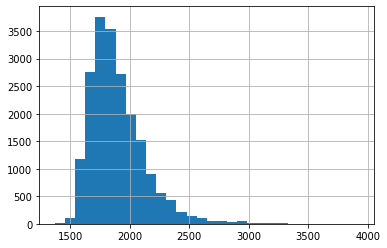

In [16]:
%matplotlib inline
times['Result'][(times.distance == '8k') & (times.sex == 'M')].hist(bins = 30)

<AxesSubplot:>

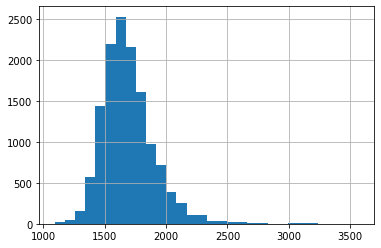

In [17]:
%matplotlib inline
times['Result'][(times.distance == '6k') & (times.sex == 'F')].hist(bins = 30)

we can make some interesting visuals using the whole dataset, so before we go further, we can save this one as is.

In [18]:
times.to_csv("nirca_cleaned.csv")

In [5]:
# read the previously cleaned dataset
nirca = pd.read_csv("nirca_cleaned.csv")
nirca = nirca.drop('Unnamed: 0.1', axis = 1)
nirca = nirca.drop('Unnamed: 0', axis = 1)

Dropping all 5ks and the sole mens 6k, we want to be doing most of our analysis with the typical college distances of 8k/6k

In [6]:
nirca = nirca.drop(nirca[(nirca.distance == '6k') & (nirca.sex == 'M')].index)
nirca = nirca.drop(nirca[(nirca.distance == '5k')].index)

### Making the year column

Dates will be useful for some visualizations, particularly the year. For this we can quickly make a "year" column. 

In [7]:
nirca['year'] = nirca['date'].apply(lambda x: x.strip().split()[-1])

# misc races with messed up years
nirca.year = np.where(nirca.year == "Rd.", "2017", nirca.year)
nirca.year = np.where(nirca.year == "Drive", "2016", nirca.year)
nirca.year = np.where(nirca.year == "<br/>", "2015", nirca.year)

### Assigning column ids

Onto the id column creation. The idea is to combine names and club to prevent any repeat names being tagged together, and assigning those a number, beginning at 100 and ending at the max number of unique persons we find.

In [8]:
# combine first name, last name, and club into name column
nirca['name'] = nirca['First Name'] + " " + nirca['Last Name'] + " " + nirca['Club']
nirca['name'] = nirca['name'].apply(lambda x: x.strip().lower())

In [9]:
# runner ids
# 100 -> no. of unique runners * 100
names = nirca['name'].unique()
max_iter = len(names) + 100

# create list of ids
ids = [*range(100, max_iter)]

# create id column
nirca['id'] = 100

for i in range(0, len(names)):
    nirca['id'] = np.where(names[i] == nirca.name, ids[i], nirca.id)

In [10]:
# drop the name column since we only needed it for the id creation
nirca = nirca.drop('name', axis = 1)

With the ids created, we can take a look at the distribution of races run from 2015-2019.

<AxesSubplot:>

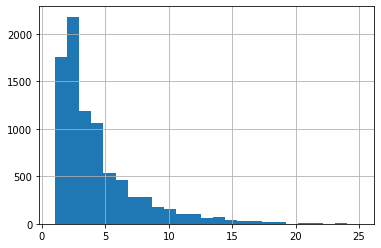

In [269]:
ngb = nirca.groupby('id')

%matplotlib inline
ngb.Result.size().hist(bins = 25)

In [24]:
print('%runners with 1 race or less: ' + str(sum(ngb.Result.size() == 1) / max(nirca.id)))
print('%runners with 2 races or less: ' + str(sum(ngb.Result.size() <= 2) / max(nirca.id)))
print('%runners with 3 races or less: ' + str(sum(ngb.Result.size() <= 3) / max(nirca.id)))

%runners with 1 race or less: 0.2026715799170889
%runners with 2 races or less: 0.45370796867802854
%runners with 3 races or less: 0.5909719023491479


Nearly 45% of our data comes from runners with only one or two races and this jumps to almost 60% at three or less. This is not unexpected for a club sport, people jump in and out of clubs all the time, or join for a year or two and decide they dont like it and move on. A much higher retention rate would be more shocking. 

Dropping the runners with only one or two races run eliminates a lot of noise. People that are only around for a year or so wont make for great inclusions to our dataset, and don't need to be included. This has the caveat of potentially removing a lot of freshmen / sophomores from the dataset, as they are more likely to only be around for a year or two, and even remove some seniors or alums that were around before 2015, but we're looking for consistency, not volume. This has an added benefit of reducing the computing power needed for the analysis.

The cutoff can be increased if we are unhappy with the way our analysis turns out, but for now this should be reasonable.

In [12]:
ngb = nirca.groupby('id')

# make a list of ids with only 1 race
ones = [i for i in range(100, 8685) if (ngb.Result.size() <= 2)[i] == True]

# drop ids in the list
nirca_racers = nirca.drop(nirca[nirca.id.isin(ones)].index)

The last thing needed before we perform our analysis is to drop the unnecessary columns and save the dataset.

We end up with three datasets

1. nirca = cleaned dataset with ids and all runners
2. nirca_racers = dataset with only runners with more than 2 races run

In [13]:
nirca.to_csv("nirca_no_5k.csv") 
nirca_racers.to_csv("nirca_racers.csv")

## Visualizations / Data Exploration

With our cleaned dataset, we can explore the data a little and learn about our sample. 

Lets first take a look at some statistics across classes.

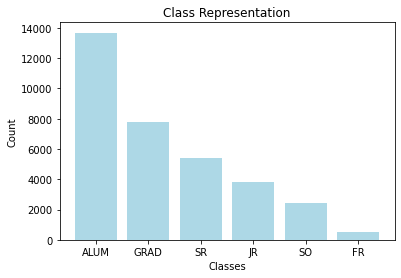

In [69]:
classes = nirca.groupby('Class')

# classes are out of order
cs = classes.size()
c = ['ALUM', 'GRAD', 'SR', 'JR', 'SO', 'FR']
h = [cs[0], cs[2], cs[5], cs[3], cs[4], cs[1]]

plt.bar(c, h, color = 'lightblue')
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Class Representation")
plt.show()

There are a lot more alum runners than we expected, which is shocking, and makes us think there's something wrong with the way NIRCA has tagged their runners on their website, as these results are wildly counter to anything we've seen while participating in club running. While it could definitely be possible for these results to be accurate, and that the club at virginia tech is different from clubs across the entire country, it's odd that alumni comprise of so much of our dataset, and freshmen so little. In fact, it's likely that whatever NIRCA is using for tagging runners is mis-tagging freshmen as ALUM. As a result, these grade tags are unfortuneately probably useless.

Interestingly however, looking at grade-level averages, it's about what we expected, with freshmen being the slowest, and the alums being slightly faster than the rest. 

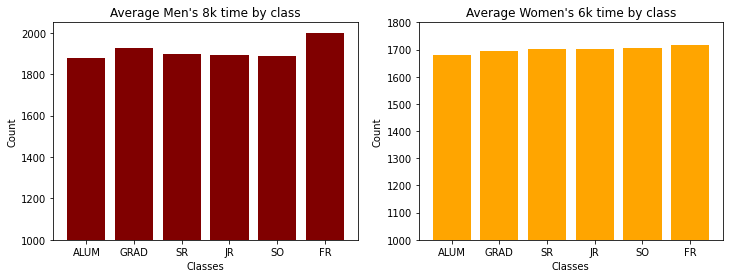

In [157]:
# make the data
m = nirca[nirca.sex == 'M'].groupby('Class').Result.agg('mean')
f = nirca[nirca.sex == 'F'].groupby('Class').Result.agg('mean')

c = ['ALUM', 'GRAD', 'SR', 'JR', 'SO', 'FR']
mh = [m[0], m[2], m[5], m[3], m[4], m[1]]
fh = [f[0], f[2], f[5], f[3], f[4], f[1]]

# make the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))

ax1.bar(c, mh, color = 'maroon')
ax1.set_ylim([1000, 2050])
ax1.set_xlabel("Classes")
ax1.set_ylabel("Count")
ax1.set_title("Average Men's 8k time by class")

ax2.bar(c, fh, color = 'orange')
ax2.set_ylim([1000, 1800])
ax2.set_xlabel("Classes")
ax2.set_ylabel("Count")
ax2.set_title("Average Women's 6k time by class")

plt.show()

Since grade level analysis is unfortunately unlikely to be accurate, we can continue from something we were looking at in filtering runners above, participation. 

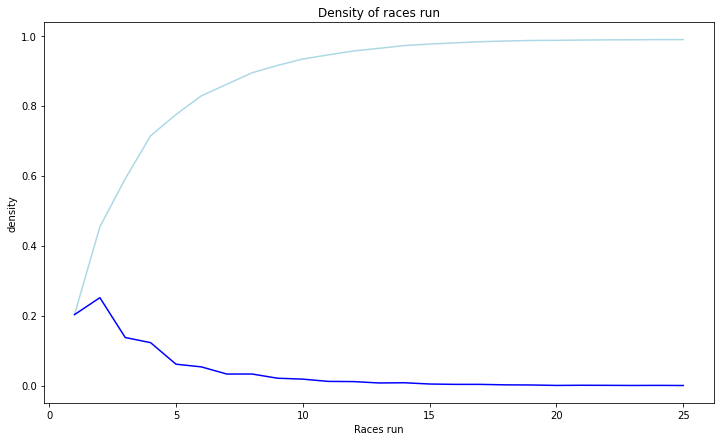

In [245]:
# use unfiltered
pcts = [(sum(ngb.Result.size() <= i) / max(nirca.id)) for i in range(1, max(ngb.Result.size()) + 1)]
pcts_ind = [(sum(ngb.Result.size() == i) / max(nirca.id)) for i in range(1, max(ngb.Result.size()) + 1)]
plt.subplots(1, 1, figsize = (12, 7))
plt.plot(range(1, 26), pcts, color = 'lightblue')
plt.plot(range(1, 26), pcts_ind, color = 'blue')
plt.xlabel("Races run")
plt.ylabel("density")
plt.title("Density of races run")
plt.show()

Extending what we did earlier with a density plot of the runners, we can look at the percentages of the number of races each runner has run. It's pretty clear that the vast majority of runners only run up to three races. The density line jumps rapidly, with an elbow around 7 or 8, and around 75% of all runners having run 1-5 races. 

Again, this isn't all too surprising. The Club Running season is usually only 4-5 races total, and members don't often run all of those races. Another reason the participation could be so low is that the requirements for participating in club nationals is only a single race prior to entry, meaning some racers only run two races a season - and as we see reflected in the chart, there's a large spike at two races. 

Moving on to the individual clubs, let's see how many we actually have in our dataset.

In [272]:
clubs = nirca.groupby("Club")
len(nirca.Club.unique())

126

126 clubs across the country is a pretty solid number for a sport like cross country, and especially for a club sport. 

With the addition of ids, we can look at club participation over the years, and see what the top schools were in terms of membership. First we can see all schools in the dataset.

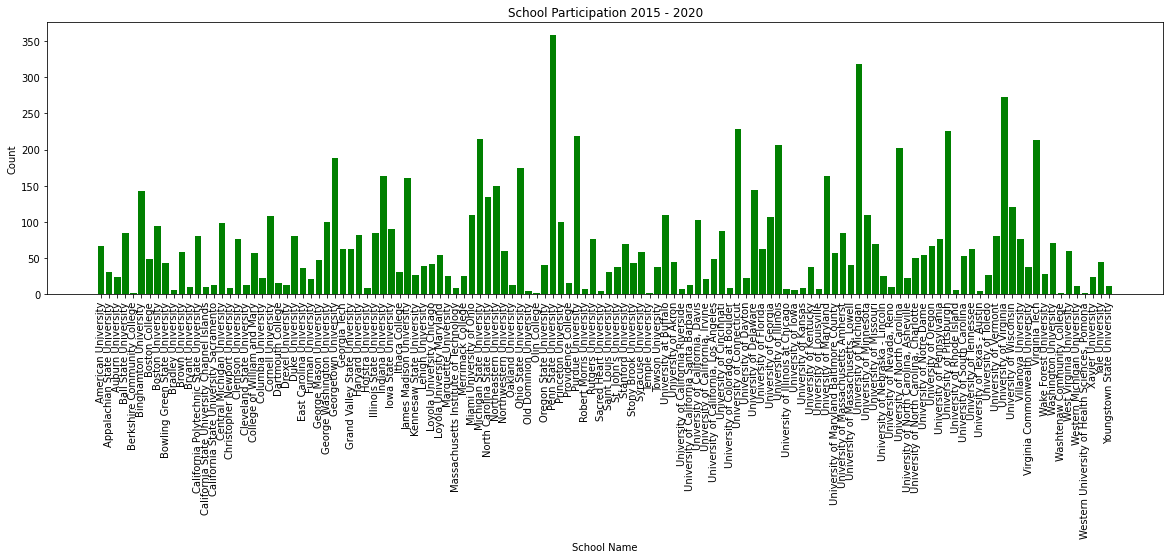

In [273]:
a = list(nirca.Club.unique())
a.sort()

fig, ax = plt.subplots(1, 1, figsize = (20, 5))
ax.bar(a, list(clubs.id.nunique()), color = "green")
ax.set_title("School Participation 2015 - 2020")
ax.set_xlabel("School Name")
ax.set_ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

Next, we can look at the top 50 schools, as it's difficult to pick up different schools, just given the massive number of them. 

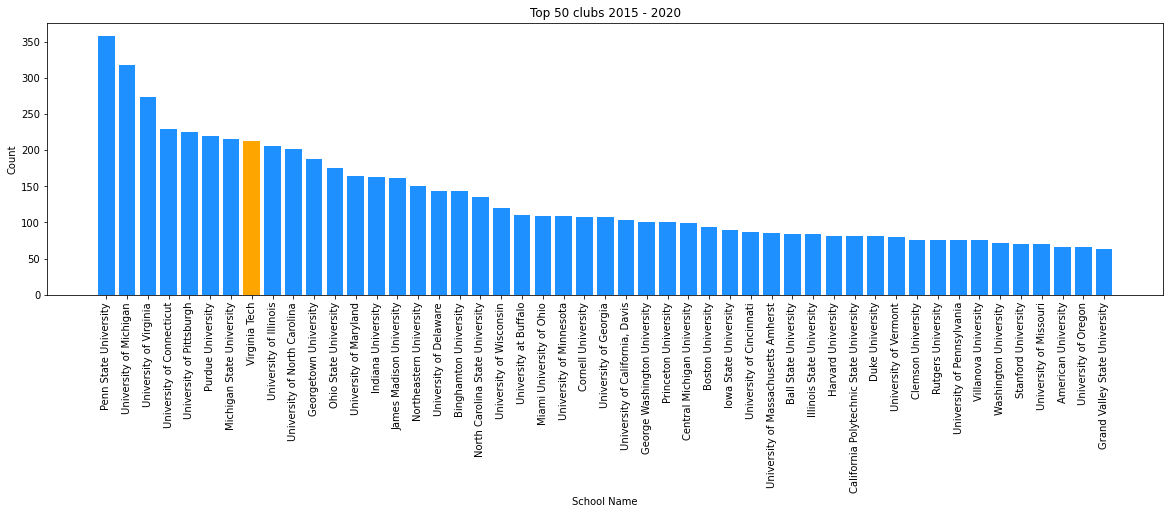

In [274]:
par = list(zip(a, list(clubs.id.nunique())))
par.sort(key = lambda x: x[1], reverse = True)


schools = [i[0] for i in par[0:49]]
members = [i[1] for i in par[0:49]]
clr = ['orange' if (i == "Virginia Tech") else "dodgerblue" for i in schools]

fig, ax = plt.subplots(1, 1, figsize = (20, 5))
ax.bar(schools, members, color = clr)
ax.set_title("Top 50 clubs 2015 - 2020")
ax.set_xlabel("School Name")
ax.set_ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

From a closer look at just the top 50 schools in membership, there's a clear divide between the top 3 and the rest. Penn State, Michigan, and UVA's clubs just seem to have had more people coming through them than the rest.

There are some surprising schools in the top 50, like Georgetown or Purdue. University of Conneticut being the 4th largest school is surprising as well, going into this we thought the largest schools in club running would be reflective of their universities sizes. From this, it appears that that isn't necessarily the case.

A relationship that might be interesting to explore is that of time and result. You'd expect to see a general downward trend, as the faster times would place higher, but it's a little different when we make a scatter plot of it.

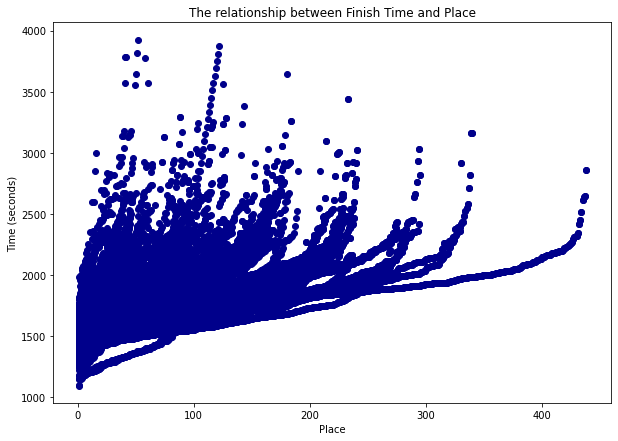

In [420]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))

ax.scatter(nirca.Place, nirca.Result, c = 'darkblue')
ax.set_ylabel("Time (seconds)")
ax.set_xlabel("Place")
ax.set_title("The relationship between Finish Time and Place")

plt.show()

It's interesting to see the "fingers" of each race in the dataset, with the longer ones likely being championship events. 

Also interesting, there doesn't appear to be a clear correlation between the two, but with data transformations, it's possible one could appear.

## Analysis

After exploring and familiarizing ourselves with our dataset, we can proceed with some analysis.

### Clustering similar athletes

The first idea we'd like to explore is using clustering techniques to identify similar runners. We can gather each runners top 3 times and perform a kmeans clustering on that database.

We're doing the top 3 times, as we set the cutoff for our dataset at at least 3 races run, and we'd like to have an even dataset for our kmeans model.

In [380]:
# split into mens and womens
mens = nirca_racers[nirca_racers.sex == "M"]
womens = nirca_racers[nirca_racers.sex == "F"]

# sort by top times, smallest = fastest
womens = womens.sort_values(by = "Result", ascending = True)
mens = mens.sort_values(by = "Result", ascending = True)

# grab the first three races from each id
kmm = mens.groupby('id').Result.nsmallest(3).to_frame()
kmw = womens.groupby('id').Result.nsmallest(3).to_frame()

In [381]:
# reset the indices
kmm.reset_index(inplace=True)
kmw.reset_index(inplace=True)

In [382]:
# drop some oddities
kmm.groupby('id').size().sort_values()
kmm = kmm.drop(kmm[kmm.id == 1291].index)

In [383]:
kmw.groupby('id').size().sort_values()
kmw = kmw.drop(kmw[kmw.id == 1291].index)

In [384]:
# reset the indicies to compress the widened dataset
kmm['level_1'] = [*range(1, 4)] * 2789
kmw['level_1'] = [*range(1, 4)] * 1855

In [385]:
# widen the dataset
kmm = kmm.pivot(index = 'id', columns = 'level_1', values = 'Result')
kmw = kmw.pivot(index = 'id', columns = 'level_1', values = 'Result')

In [386]:
kmm.head()

level_1,1,2,3
id,,,
100,1589.29,1589.29,1667.47
103,1589.29,1589.29,1606.46
104,1536.36,1586.26,1586.26
105,1608.48,1608.48,1617.57
107,1560.00,1597.37,1609.49


Now with the wide datasets, we can compute our kmeans clusters.

We've opted not to normalize our data, as we only have three points for each runner, so normalizing across each row would be almost pointless, especially because the datapoints are only the fastest times each runner has produced.

We'll start with 20 clusters, and then compute an elbow plot to see if there's a better number to pursue.

In [388]:
import sklearn.cluster as cl

kmm_mod = cl.KMeans(n_clusters=20)
kmw_mod = cl.KMeans(n_clusters=20)

mlabels = kmm_mod.fit_predict(kmm)
wlabels = kmw_mod.fit_predict(kmw)

kmm['CID'] = mlabels
kmw['CID'] = wlabels

Now, to compress this into 2d and plot it, we can compute manifold distances and get our x and y values

In [395]:
import sklearn.metrics.pairwise as pairs
import sklearn.manifold as mani

kmmHD = pairs.manhattan_distances(kmm.iloc[:,:-1])
kmwHD = pairs.manhattan_distances(kmw.iloc[:,:-1])

kmmDist = pd.DataFrame(kmmHD, columns=kmm.index, index=kmm.index)
kmwDist = pd.DataFrame(kmwHD, columns=kmw.index, index=kmw.index)

For the mds calculations to flatten our data, we're going with 100 iterations to save on computing power seeing as we have to run it twice, and that we have a lot of data to parse through.

In [398]:
mds = mani.MDS(dissimilarity='precomputed', n_init=10, max_iter=100)

kmm2d = mds.fit_transform(kmmDist)
kmw2d = mds.fit_transform(kmwDist)

kmm2d = pd.DataFrame(kmm2d, columns = ['x', 'y'], index = kmm.index)
kmw2d = pd.DataFrame(kmw2d, columns = ['x', 'y'], index = kmw.index)

In [400]:
kmm2d['CID'] = kmm.CID
kmw2d['CID'] = kmw.CID

With those (finally) computed, we can plot these two datasets

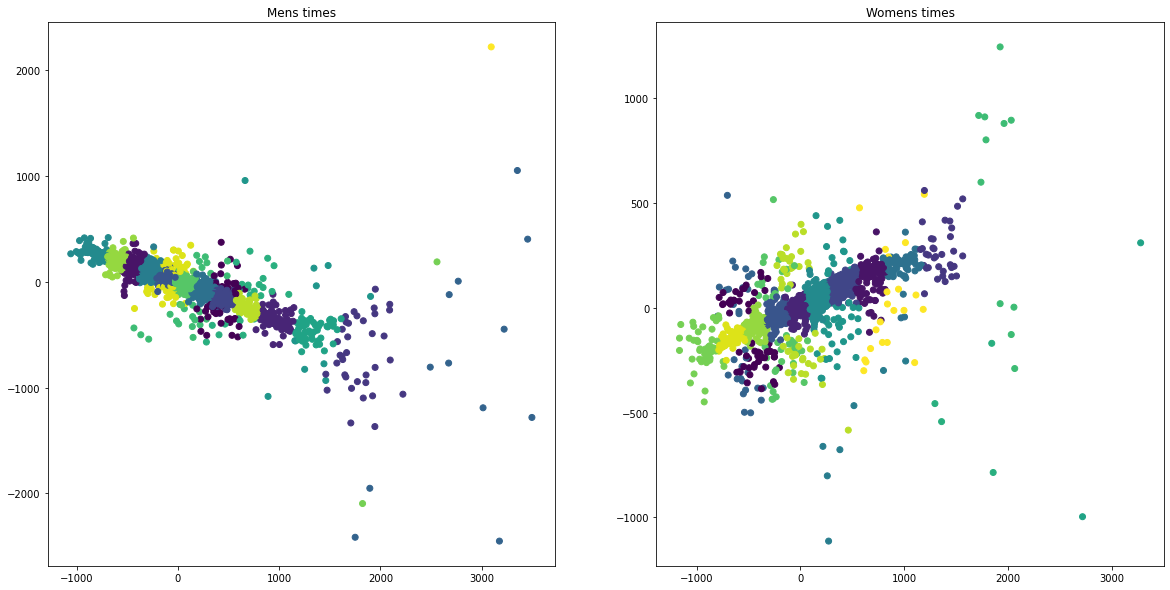

In [412]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

ax1.scatter(kmm2d.x, kmm2d.y, c=kmm2d.CID)
ax1.set_title("Mens times")

ax2.scatter(kmw2d.x, kmw2d.y, c=kmw2d.CID)
ax2.set_title("Womens times")

plt.show()

This model with 20 clusters results in some interesting clusters. It's interesting that the men's group has a downward trend, while the womens has an upward. 

These clusters seem reasonable to the naked eye, but we can definitely cut down on the clusters. Let's take a look at an elbow plot to see if there's a natural number of clusters.

In [423]:
# mens
data_m = []
data_w = []

for i in range(2,51):
    kmm2 = cl.KMeans(n_clusters=i)
    kmw2 = cl.KMeans(n_clusters=i)
    mlab = kmm2.fit_predict(kmm)
    wlab = kmw2.fit_predict(kmw)
    data_m.append((i, kmm2.inertia_))
    data_w.append((i, kmw2.inertia_))

In [425]:
mdf = pd.DataFrame(data_m, columns = ['i', 'inertia'])
wdf = pd.DataFrame(data_w, columns = ['i', 'inertia'])

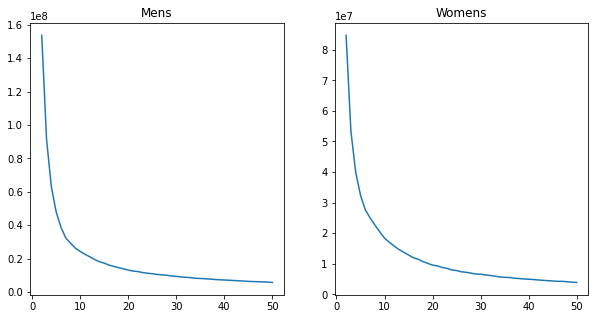

In [429]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.plot(mdf.i, mdf.inertia)
ax1.set_title("Mens")
ax2.plot(wdf.i, wdf.inertia)
ax2.set_title("Womens")

plt.show()

Based on these plots, there's not definite "elbow", but somewhere around 7-8 for men and around 10 for women seems to be the sweet spot. Let's rerun the dataframe with these new clusters.

In [430]:
kmm_mod = cl.KMeans(n_clusters=7)
kmw_mod = cl.KMeans(n_clusters=10)
mlabels = kmm_mod.fit_predict(kmm)
wlabels = kmw_mod.fit_predict(kmw)
kmm['CID'] = mlabels
kmw['CID'] = wlabels

In [431]:
kmmHD = pairs.manhattan_distances(kmm.iloc[:,:-1])
kmwHD = pairs.manhattan_distances(kmw.iloc[:,:-1])

kmmDist = pd.DataFrame(kmmHD, columns=kmm.index, index=kmm.index)
kmwDist = pd.DataFrame(kmwHD, columns=kmw.index, index=kmw.index)

In [432]:
mds = mani.MDS(dissimilarity='precomputed', n_init=10, max_iter=100)
kmm2d = mds.fit_transform(kmmDist)
kmw2d = mds.fit_transform(kmwDist)
kmm2d = pd.DataFrame(kmm2d, columns = ['x', 'y'], index = kmm.index)
kmw2d = pd.DataFrame(kmw2d, columns = ['x', 'y'], index = kmw.index)

In [433]:
kmm2d['CID'] = kmm.CID
kmw2d['CID'] = kmw.CID

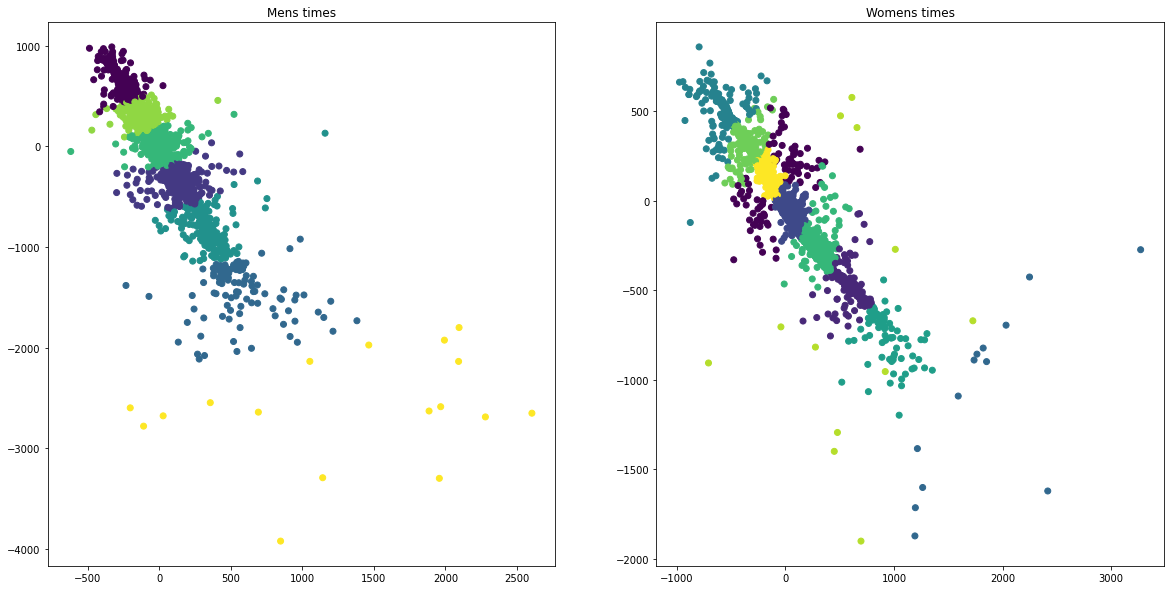

In [434]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

ax1.scatter(kmm2d.x, kmm2d.y, c=kmm2d.CID)
ax1.set_title("Mens times")

ax2.scatter(kmw2d.x, kmw2d.y, c=kmw2d.CID)
ax2.set_title("Womens times")

plt.show()

This looks much more interesting than our original plot. On the mens side, the top group's cluster is more pronounced, with the lower ends sitting closer to the two middle groups, which are much more uniform than other groups. The bottom few clusters tend to be a little less defined, ending with the yellow cluster of misfits. These are probably slower runners, or runners that saw a large amount of improvement over their three times. 

The women's plot is a little more scattered overall, with far more erratic groups. We think this is the result of women having slightly less variability in their dataset, and having less of a noticeable improvement in times as they get older. 

Overall though, based on our explorations and visualizations, this is about what we thought we should have seen - smaller, tightly packed groups with a highly variable tail. 

### Regressing on Result and Place

The next analysis we wanted to conduct is a regression on the result and place variables. We first explored this in our initial visualizations, and saw that, while it didn't have an explicitly clear correlation, we could potentially explore data transformations to see if one did exist. 

To start, we can make a simple dataframe of just our two variables

In [489]:
regdf = nirca.loc[:,['Place', 'Result']]
regdf = regdf.dropna()

Now let's take a look at how some transformations look. We can plot them side by side to see the results.

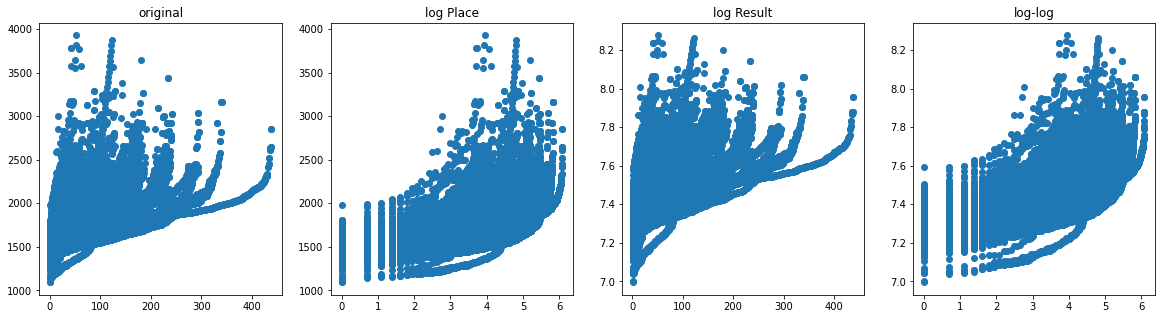

In [478]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 5))

ax1.scatter(regdf.Place, regdf.Result)
ax2.scatter(np.log(regdf.Place), regdf.Result)
ax3.scatter(regdf.Place, np.log(regdf.Result))
ax4.scatter(np.log(regdf.Place), np.log(regdf.Result))

ax1.set_title("original")
ax2.set_title("log Place")
ax3.set_title("log Result")
ax4.set_title("log-log")

plt.show()

The log place transformation appears to be the best, as it's usually preferable to not transform the response variable. 

The data also appears to be quadratic, so we'll need to keep that in mind as we build our model. We can also go ahead and transform our data since we know what we'll be going ahead with.

In [490]:
from sklearn.linear_model import LinearRegression

regdf['Place'] = np.log(regdf.Place)

We'll be doing multilinear regression, so we need to make an x and an x^2, along with our response y

In [497]:
x = regdf.Place
xsq = x**2
y = regdf.Result

we next need to combine x and xsq into nested lists. This will take a second, as lists are slow in python.

In [500]:
xc = [list(l) for l in zip(x, xsq)]

Now we can make our model and see how it turns

In [501]:
X = np.array(xc)
Y = np.array(y)

model = LinearRegression().fit(X, Y)

In [506]:
print("R-sq: ", model.score(X, Y))
print("intercept: ", model.intercept_)
print("coefficients: ", model.coef_)

R-sq:  0.3260456857478806
intercept:  1520.0008885657726
coefficients:  [-8.81044953 19.33765764]


Even with the transformations, this is a very loose fit. We can plot our best fit line to see how it looks on our data for a better idea.

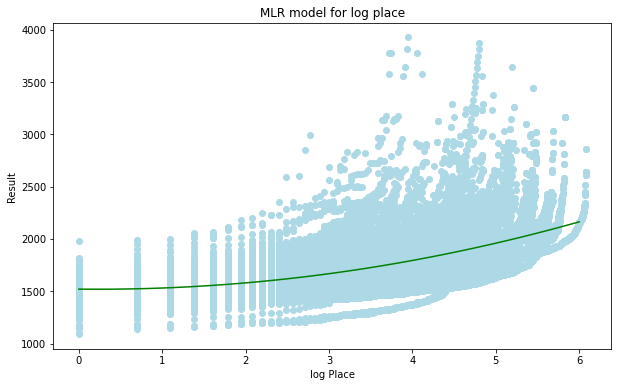

In [529]:
x_ = np.linspace(0, 6, 100)
y_ = model.intercept_ + (model.coef_[0] * x_) + (model.coef_[1] * (x_**2))

plt.subplots(1, 1, figsize = (10, 6))
plt.scatter(regdf.Place, regdf.Result, color = "lightblue")
plt.plot(x_, y_, '-', color = 'green')
plt.xlabel("log Place")
plt.ylabel("Result")
plt.title("MLR model for log place")
plt.show()

The least squares line that we came up with doesn't seem to be the most aggressive curve we might have expected, but for the total amount of data, and the amount of variance in the dataset, it seem pretty good. A 0.34 R^2 value is technically classified as a weak, positive correlation, which definitely does not support our initial theory that a correlation might exist with some transformation of the data. 

## Group Contributions

Matthew Rogers: Finished the work on the dataset, as I alread had it in progress when caleb joined the group, made ~50% of the visualizations, and did the regression analysis.

Caleb Slaughter: Did ~50% of the visualizations, did the clustering analysis.